In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [8]:
def show_p_matrix(title):
    data = pd.read_csv("D:/Estudios/Tesis/resultados/MHEALTH/150_25/rf_f1.csv")
    activations = ["f1_C_7_150_25","f1_L_6_150_25","f1_R_7_150_25"]
    for af in activations:
        data[af] = np.array(data[af])
    rv = norm()
    p_val_matrix = np.zeros((3,3))
    for c, activation1 in enumerate(activations):
        mean_X = np.mean(data[activation1])
        var_X = np.var(data[activation1], ddof=0)
        for d, activation2 in enumerate(activations):
            mean_Y = np.mean(data[activation2])
            var_Y = np.var(data[activation2], ddof=0)
            test_statistic = (mean_X - mean_Y) / np.sqrt(var_X / 150 + var_Y / 150)
            p_val_matrix[c, d] = 1 - rv.cdf(test_statistic)
    df_cm = pd.DataFrame(p_val_matrix, index=activations, columns=activations)
    sns.heatmap(df_cm, annot=True, fmt=".3f", cmap="Blues_r", vmin=0, vmax=0.05, cbar=False)
    plt.title(title)
    plt.show()

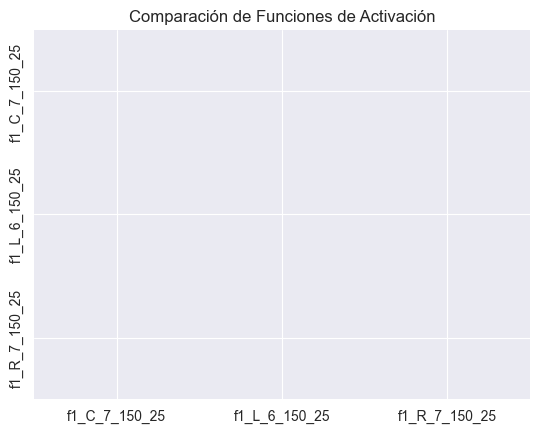

In [9]:
show_p_matrix("Comparación de Funciones de Activación")